# SMS Spam Filtering Using Machine Learning

In [1]:
import numpy as np
import pandas as pd

## Importing Dataset

In [2]:
sms=pd.read_csv('https://raw.githubusercontent.com/Sudarshana-Chakravarthy/SMS-Spam-Filtering/main/spam.csv',encoding='latin-1')
sms.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


## Pre-Processing

In [3]:
sms=sms.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1)
sms.rename(columns = {'v1':'label','v2':'message'},inplace=True)
sms.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
sms.groupby(by='label').describe()

message                                                               
        count unique                                                top freq
label                                                                       
ham      4825   4516                             Sorry, I'll call later   30
spam      747    653  Please call our customer service representativ...    4

In [5]:
sms['length'] = sms['message'].apply(len)
sms.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


array([<AxesSubplot:title={'center':'ham'}>,
       <AxesSubplot:title={'center':'spam'}>], dtype=object)

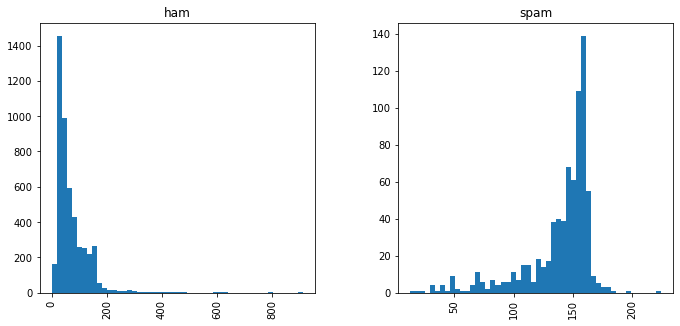

In [6]:
import matplotlib.pyplot as plt
sms.hist(column='length', by='label', bins=50,figsize=(11,5))

([<matplotlib.patches.Wedge at 0x7fc87f6f2c88>,
 [Text(-1.0038714981945518, 0.4497132587689916, 'Ham'),
  Text(1.0038714771419537, -0.44971330576360763, 'Spam')],
 [Text(-0.5475662717424827, 0.24529814114672266, '86.59%'),
  Text(0.5475662602592474, -0.2452981667801496, '13.41%')])

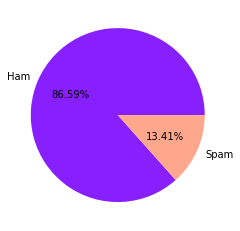

In [7]:
plt.pie(sms.label.value_counts(),labels=['Ham','Spam'],colors=["#871fff","#ffa78c"],autopct='%1.2f%%')